In [102]:
import gym 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [131]:
# Action space:
# LEFT = 0
# DOWN = 1
# RIGHT = 2
# UP = 3

In [150]:
env = gym.make('FrozenLake-v0')

In [151]:
epsilon = 0.1
alpha = 0.3
gamma = 0.9
q = np.zeros((4*4,4))
pi =  np.ones_like(q) * 0.25

In [152]:
n_episodes = 100000
r_sums = []
steps = []
for n in range(n_episodes): 
    s = env.reset()
    done = False
    r_sum = 0
    n_steps = 0 
    while not done: 
        n_steps +=1
        x = np.random.random()
        a = np.argmax(np.cumsum(pi[s,:]) > x)
        s_prime, r, done, info = env.step(a)
        r_sum += r 
        q[s,a] = q[s,a] + alpha * (r + gamma * np.max(q[s_prime]) - q[s,a])
        best_a = np.random.choice(np.where(q[s] == np.max(q[s]))[0])
        for i in range(4): 
            if i == best_a:  pi[s,i] = 1 - (3 * epsilon / 4)
            else:            pi[s,i] = epsilon / 4
        s = s_prime
    alpha *= 0.9999
    r_sums.append(r_sum)
    steps.append(n_steps)
    if n % 10000 == 0 : print(alpha, n)

0.29997 0
0.11034727809849822 10000
0.040592465192343406 20000
0.014932386722949293 30000
0.005493043405645911 40000
0.0020206766953026417 50000
0.0007433282436367472 60000
0.00027344150554739656 70000
0.00010058847836887261 80000
3.7002582911873686e-05 90000


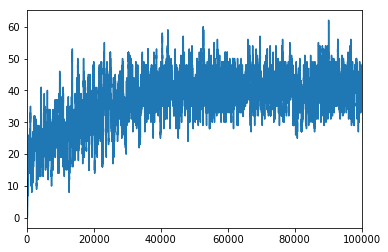

In [154]:
r_ma = pd.Series(r_sums).rolling(100,100).sum()
r_ma.plot()

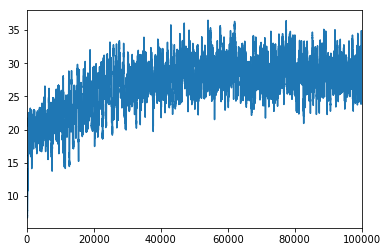

In [155]:
pd.Series(steps).rolling(100,100).mean().plot()